In [107]:
import pandas as pd

# Load the data
df = pd.read_csv("football_salaries.csv")

# Columns that must NOT be zero
cols_to_check = [
    "age",
    "total_value",
    "avg_year",
    "total_guaranteed",
    "fully_guaranteed"
]

# List to store indices of rows we want to keep
rows_to_keep = []

# Loop through each row by numeric index
for i in range(len(df)):
    row = df.iloc[i]
    
    keep = True   # assume row is good
    
    # Check every required column
    for col in cols_to_check:
        if row[col] == 0:
            keep = False
            break  # no need to continue checking
    
    if keep:
        rows_to_keep.append(i)

# Build cleaned DataFrame from rows we kept
clean_df = df.loc[rows_to_keep]

# Save result
clean_df.to_csv("football_salaries_no_zero.csv", index=False)

print(clean_df)

            position          player      team  age  total_value  avg_year  \
0       right-tackle     Trent Brown   Raiders   26     66000000  16500000   
1       right-tackle   Ja’Wuan James   Broncos   27     51000000  12750000   
2       right-tackle    Lane Johnson    Eagles   29     56250000  11250000   
3       right-tackle    Ricky Wagner     Lions   30     47500000   9500000   
4       right-tackle  Rob Havenstein      Rams   26     32500000   8125000   
...              ...             ...       ...  ...          ...       ...   
5451  defensive-back     Kenny Moore     Colts   24      1667500    555833   
5453  defensive-back   Kavon Frazier   Cowboys   26      2170356    542589   
5499  defensive-back     A.J. Howard  Patriots   24       505000    505000   
5500  defensive-back     Duke Thomas   Vikings   25       500000    500000   
5501  defensive-back    Rico Gafford   Raiders   23       995600    497800   

      total_guaranteed  fully_guaranteed free_agency  
0       

In [108]:
import pandas as pd

df = pd.read_csv("football_salaries_no_zero.csv")

# Remove duplicate players (keep first entry)
clean_df = df.drop_duplicates(subset="player", keep="first")

print(clean_df)

           position           player       team  age  total_value  avg_year  \
0      right-tackle      Trent Brown    Raiders   26     66000000  16500000   
1      right-tackle    Ja’Wuan James    Broncos   27     51000000  12750000   
2      right-tackle     Lane Johnson     Eagles   29     56250000  11250000   
3      right-tackle     Ricky Wagner      Lions   30     47500000   9500000   
4      right-tackle   Rob Havenstein       Rams   26     32500000   8125000   
...             ...              ...        ...  ...          ...       ...   
3072  wide-receiver  Trent Sherfield  Cardinals   23      1720000    573333   
3073  wide-receiver    Vyncint Smith     Texans   23      1720000    573333   
3074  wide-receiver  Derrick Willies     Browns   25      1712500    570833   
3100  wide-receiver      Austin Carr     Saints   26      1672500    557500   
3109  wide-receiver  Kendrick Bourne      49ers   24      1670000    556667   

      total_guaranteed  fully_guaranteed free_agenc

In [109]:
clean_df.to_csv("football_salaries_cleaned.csv", index=False)

In [110]:
import pandas as pd

df = pd.read_csv("football_salaries_cleaned.csv")

# Group players by position
grouped = df.groupby("position")

for pos, group in grouped:
    print(f"Position: {pos}")
    print(group[["player", "position"]])
    print("-----")

Position: 3-4-defensive-end
                  player           position
57             J.J. Watt  3-4-defensive-end
58         Jurrell Casey  3-4-defensive-end
69         Stephon Tuitt  3-4-defensive-end
70           Akiem Hicks  3-4-defensive-end
71      Michael Brockers  3-4-defensive-end
72      Brandon Williams  3-4-defensive-end
73       Cameron Heyward  3-4-defensive-end
74          Mike Daniels  3-4-defensive-end
75           Derek Wolfe  3-4-defensive-end
76        Henry Anderson  3-4-defensive-end
94     Matthew Ioannidis  3-4-defensive-end
95          DaQuan Jones  3-4-defensive-end
96      Leonard Williams  3-4-defensive-end
97       Angelo Blackson  3-4-defensive-end
117      Jeffery Simmons  3-4-defensive-end
118       Jonathan Allen  3-4-defensive-end
119         Tyson Alualu  3-4-defensive-end
120            Zach Kerr  3-4-defensive-end
121           Carl Davis  3-4-defensive-end
154           Josh Mauro  3-4-defensive-end
155      DeMarcus Walker  3-4-defensive-end
156 

In [111]:
import pandas as pd

# Load the data
df = pd.read_csv("football_salaries_cleaned.csv")

# Replace all linebacker variants with "Linebacker"
df["position"] = df["position"].replace(
    [
        "inside-linebacker",
        "3-4-outside-linebacker",
        "4-3-outside-linebacker"
    ],
    "linebacker"
)

# Confirm the changes
print(df["position"].unique())

# (Optional) Save updated file
df.to_csv("football_salaries_updated.csv", index=False)

['right-tackle' 'linebacker' 'defensive-line' '3-4-defensive-end'
 '4-3-defensive-tackle' 'right-guard' 'left-guard' 'tight-end'
 'left-tackle' '3-4-defensive-tackle' 'center' '4-3-defensive-end'
 'long-snapper' 'punter' 'defensive-back' 'safety' 'kicker'
 'wide-receiver' 'cornerback' 'quarterback' 'running-back' 'fullback']


In [112]:
import pandas as pd

# Load the data
df = pd.read_csv("football_salaries_updated.csv")

# Replace all defensive line variants with "Defensive-Line"
df["position"] = df["position"].replace(
    [
        "4-3-defensive-end",
        "4-3-defensive-tackle",
        "3-4-defensive-end",
        "3-4-defensive-tackle"
    ],
    "defensive-line"
)

# Confirm the change
print(df["position"].unique())

# (Optional) Save updated file
df.to_csv("football_salaries_positions_updated.csv", index=False)

['right-tackle' 'linebacker' 'defensive-line' 'right-guard' 'left-guard'
 'tight-end' 'left-tackle' 'center' 'long-snapper' 'punter'
 'defensive-back' 'safety' 'kicker' 'wide-receiver' 'cornerback'
 'quarterback' 'running-back' 'fullback']


In [113]:
import pandas as pd

# Load the data
df = pd.read_csv("football_salaries_positions_updated.csv")

# Replace Cornerback and Safety with Defensive-Back
df["position"] = df["position"].replace(
    ["cornerback", "safety"],
    "defensive-back"
)

# View unique positions to confirm change
print(df["position"].unique())

# (Optional) Save updated file
df.to_csv("football_salaries_cleaned_up.csv", index=False)

['right-tackle' 'linebacker' 'defensive-line' 'right-guard' 'left-guard'
 'tight-end' 'left-tackle' 'center' 'long-snapper' 'punter'
 'defensive-back' 'kicker' 'wide-receiver' 'quarterback' 'running-back'
 'fullback']


In [114]:
import pandas as pd

df = pd.read_csv("football_salaries_cleaned_up.csv")

# Count players in each position
counts = df["position"].value_counts()

print(counts)

position
defensive-back    327
defensive-line    253
linebacker        216
wide-receiver     193
tight-end         111
running-back      105
quarterback        78
left-tackle        64
left-guard         59
center             56
right-guard        55
right-tackle       52
punter             32
long-snapper       24
kicker             24
fullback           14
Name: count, dtype: int64


In [115]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("football_salaries_cleaned_up.csv")

# Compute the average salary
average_salary = df["avg_year"].mean()

print("Average Salary of All Players:", average_salary)

Average Salary of All Players: 3256546.3680096213


In [116]:
import pandas as pd

df = pd.read_csv("football_salaries_cleaned_up.csv")

lowest_salary = df["avg_year"].min()

print("Lowest Salary in the File:", lowest_salary)

Lowest Salary in the File: 495500


In [117]:
import pandas as pd

df = pd.read_csv("football_salaries_cleaned_up.csv")

highest_salary = df["avg_year"].max()

print("Highest Salary in the File:", highest_salary)

Highest Salary in the File: 35000000


In [118]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "quarterback":
            salaries.append(float(row["avg_year"]))

average_qb_salary = sum(salaries) / len(salaries)

print("Average QB Salary:", average_qb_salary)

Average QB Salary: 7808317.794871795


In [119]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "wide-receiver":
            salaries.append(float(row["avg_year"]))

average_wr_salary = sum(salaries) / len(salaries)

print("Average WR Salary:", average_wr_salary)

Average WR Salary: 3369458.5751295337


In [120]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "defensive-back":
            salaries.append(float(row["avg_year"]))

average_db_salary = sum(salaries) / len(salaries)

print("Average DB Salary:", average_db_salary)

Average DB Salary: 2853252.9571865443


In [121]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "tight-end":
            salaries.append(float(row["avg_year"]))

average_te_salary = sum(salaries) / len(salaries)

print("Average TE Salary:", average_te_salary)

Average TE Salary: 2239550.207207207


In [122]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "running-back":
            salaries.append(float(row["avg_year"]))

average_rb_salary = sum(salaries) / len(salaries)

print("Average RB Salary:", average_rb_salary)

Average RB Salary: 2161938.523809524


In [123]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "defensive-line":
            salaries.append(float(row["avg_year"]))

average_DL_salary = sum(salaries) / len(salaries)

print("Average DL Salary:", average_DL_salary)

Average DL Salary: 3677976.2450592886


In [124]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "linebacker":
            salaries.append(float(row["avg_year"]))

average_lb_salary = sum(salaries) / len(salaries)

print("Average LB Salary:", average_lb_salary)

Average LB Salary: 2767210.171296296


In [125]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "left-tackle":
            salaries.append(float(row["avg_year"]))

average_lt_salary = sum(salaries) / len(salaries)

print("Average LT Salary:", average_lt_salary)

Average LT Salary: 4451880.71875


In [126]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "left-guard":
            salaries.append(float(row["avg_year"]))

average_lg_salary = sum(salaries) / len(salaries)

print("Average LG Salary:", average_lg_salary)

Average LG Salary: 3150402.9322033897


In [127]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "center":
            salaries.append(float(row["avg_year"]))

average_C_salary = sum(salaries) / len(salaries)

print("Average Center Salary:", average_C_salary)

Average Center Salary: 3385514.1964285714


In [128]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "right-guard":
            salaries.append(float(row["avg_year"]))

average_rg_salary = sum(salaries) / len(salaries)

print("Average RG Salary:", average_rg_salary)

Average RG Salary: 3759156.654545455


In [129]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "right-tackle":
            salaries.append(float(row["avg_year"]))

average_rt_salary = sum(salaries) / len(salaries)

print("Average RT Salary:", average_rt_salary)

Average RT Salary: 3657877.903846154


In [130]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "punter":
            salaries.append(float(row["avg_year"]))

average_p_salary = sum(salaries) / len(salaries)

print("Average Punter Salary:", average_p_salary)

Average Punter Salary: 1616220.15625


In [131]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "long-snapper":
            salaries.append(float(row["avg_year"]))

average_ls_salary = sum(salaries) / len(salaries)

print("Average LS Salary:", average_ls_salary)

Average LS Salary: 1007031.375


In [132]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "kicker":
            salaries.append(float(row["avg_year"]))

average_k_salary = sum(salaries) / len(salaries)

print("Average Kicker Salary:", average_k_salary)

Average Kicker Salary: 2753225.375


In [133]:
import csv

salaries = []

with open("football_salaries_cleaned_up.csv") as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row["position"] == "fullback":
            salaries.append(float(row["avg_year"]))

average_fb_salary = sum(salaries) / len(salaries)

print("Average FB Salary:", average_fb_salary)

Average FB Salary: 1437013.357142857


In [89]:
import pandas as pd

# Load the cleaned salary data
df = pd.read_csv("football_salaries_cleaned_up.csv")

# Calculate contract length
df["contract_length"] = df["total_value"] / df["avg_year"]

# Optional: round to 2 decimal places
df["contract_length"] = df["contract_length"].round(2)

# View results
print(df[["player", "total_value", "avg_year", "contract_length"]])

               player  total_value  avg_year  contract_length
0         Trent Brown     66000000  16500000              4.0
1       Ja’Wuan James     51000000  12750000              4.0
2        Lane Johnson     56250000  11250000              5.0
3        Ricky Wagner     47500000   9500000              5.0
4      Rob Havenstein     32500000   8125000              4.0
...               ...          ...       ...              ...
1658  Trent Sherfield      1720000    573333              3.0
1659    Vyncint Smith      1720000    573333              3.0
1660  Derrick Willies      1712500    570833              3.0
1661      Austin Carr      1672500    557500              3.0
1662  Kendrick Bourne      1670000    556667              3.0

[1663 rows x 4 columns]


In [134]:
import pandas as pd

# Load the data
df = pd.read_csv("football_salaries_cleaned_up.csv")

df["contract_length"] = df["total_value"] / df["avg_year"]

# Group by position and calculate average contract length
avg_contract_length_by_position = df.groupby("position")["contract_length"].mean()

# Optional: round for readability
avg_contract_length_by_position = avg_contract_length_by_position.round(2)

# Display results
print(avg_contract_length_by_position)

position
center            3.14
defensive-back    3.22
defensive-line    3.24
fullback          3.21
kicker            3.09
left-guard        3.22
left-tackle       3.46
linebacker        3.31
long-snapper      3.50
punter            3.44
quarterback       2.99
right-guard       3.15
right-tackle      4.04
running-back      3.10
tight-end         3.08
wide-receiver     3.13
Name: contract_length, dtype: float64


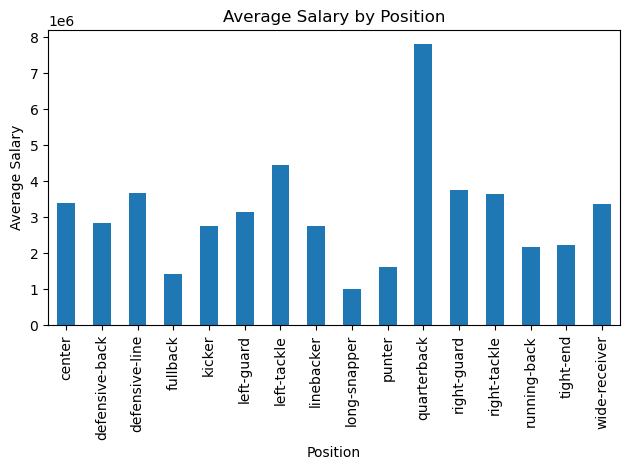

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("football_salaries_cleaned_up.csv")

# Group by position and calculate the average salary
avg_salary_by_position = df.groupby("position")["avg_year"].mean()

# Create the bar chart
plt.figure()
avg_salary_by_position.plot(kind="bar")

# Add labels and title
plt.title("Average Salary by Position")
plt.xlabel("Position")
plt.ylabel("Average Salary")

# Adjust layout so labels fit
plt.tight_layout()

plt.savefig("avg_salary_by_position.png", bbox_inches="tight")
plt.show()

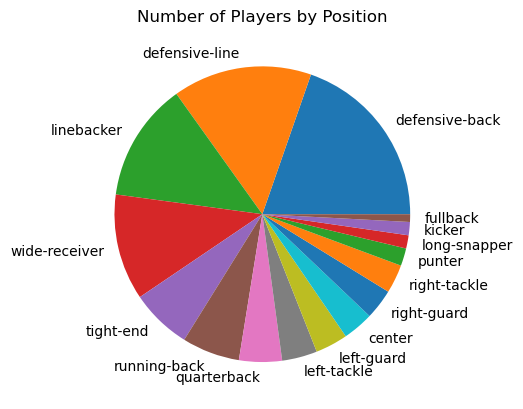

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("football_salaries_cleaned_up.csv")

# Count how many players are in each position
position_counts = df["position"].value_counts()

# Create the pie chart (no percentages)
plt.figure()
plt.pie(position_counts, labels=position_counts.index)
plt.title("Number of Players by Position")

plt.savefig("players_by_position_pie.png", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>